In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.sample(5)

RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  \
9619       9620    15779973  Gibbons          684   Germany    Male   35   
7764       7765    15751177    Milne          685   Germany  Female   44   
6692       6693    15677087    Green          662    France  Female   39   
1245       1246    15658052  Cameron          626    France  Female   44   
9045       9046    15749951    Sacco          766   Germany    Male   27   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9619       3   99967.76              1          1               1   
7764       2  119657.53              1          1               0   
6692       5  138106.75              1          0               0   
1245      10   81553.93              1          1               0   
9045       5  126285.73              1          1               0   

      EstimatedSalary  Exited  
9619        176882.08       0  
7764        145387.05       1  
6692         19596.73       0  
1245         20063.63       1  
9045        177614.17       1

In [4]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df = df.drop(columns = ['RowNumber', 'CustomerId'])

In [7]:
df['Gender'] = df['Gender'].astype("category").cat.codes

In [8]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['_Geography_isFrance'] = (df['Geography'] == 'France').astype('int')
df['_Geography_isGermany'] = (df['Geography'] == 'Germany').astype('int')
# df['_Geography_isSpain'] = (df['Geography'] == 'Spain').astype('int')

In [10]:
df.head()

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0  Hargrave          619    France       0   42       2       0.00   
1      Hill          608     Spain       0   41       1   83807.86   
2      Onio          502    France       0   42       8  159660.80   
3      Boni          699    France       0   39       1       0.00   
4  Mitchell          850     Spain       0   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   _Geography_isFrance  _Geography_isGermany  
0                    1                     0  
1                    0                     0  
2                    1                     0  
3                    1                     0  
4                    0                     0

In [11]:
df['_Balance_isEmpty'] = (df['Balance'] < 1e-3).astype('int')

In [12]:
# df['_Balance_NumOfProducts_balancePerNumOfProducts'] = df['Balance'] / df['NumOfProducts']

In [13]:
df['_NumOfProducts_isLessThanThree'] = (df['NumOfProducts'] < 3).astype('int')
# df['_NumOfProducts_isMoreThanThree'] = (df['NumOfProducts'] >= 3).astype('int')

In [14]:
df['_Surname_Length'] = df['Surname'].apply(len)

In [15]:
vowels = df['Surname'].str.lower().str.count(r'[aeiou]')
consonants = df['Surname'].str.lower().str.count(r'[a-z]') - vowels
df['_Surname_vowelsPerConsonants'] = vowels / consonants

In [16]:
df = df.drop(columns=['Surname', 'Geography'])

In [17]:
# df = df.drop(columns=['Balance', 'NumOfProducts'])

In [18]:
df.sample(5)

CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
5274          622       1   43       8      0.0              2          1   
5618          656       1   38      10      0.0              1          1   
4799          551       1   52       1      0.0              1          0   
1700          608       0   30       8      0.0              2          1   
4613          745       0   46       7      0.0              2          1   

      IsActiveMember  EstimatedSalary  Exited  _Geography_isFrance  \
5274               0        100618.17       0                    1   
5618               1        136521.82       0                    1   
4799               0         63584.55       1                    1   
1700               0        128875.86       0                    1   
4613               1         67769.94       0                    1   

      _Geography_isGermany  _Balance_isEmpty  _NumOfProducts_isLessThanThree  \
5274                     0                 1                               1   
5618                     0                 1                               1   
4799                     0                 1                               1   
1700                     0                 1                               1   
4613                     0                 1                               1   

      _Surname_Length  _Surname_vowelsPerConsonants  
5274                4                      0.333333  
5618                6                      1.000000  
4799                7                      0.400000  
1700                8                      1.000000  
4613                6                      0.500000

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.hot_r
plt.figure(figsize=(14,12))

df_correlation = df.corr().abs()
sns.heatmap(df_correlation, 
            square=True, cmap=colormap, annot=True)

In [20]:
acc=[]
for i in range(20):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=['Exited']), df['Exited'], 
        test_size=0.1)
    
#     from sklearn.preprocessing import StandardScaler
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
    
    from xgboost import XGBClassifier
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
#     xgb.fit(X_train, y_train, eval_metric='auc')
#     xgb.fit(X_train, y_train, eval_metric='logloss')
#     xgb.fit(X_train, y_train, eval_metric='error')
    y_pred = xgb.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc.append(accuracy_score(y_test, y_pred))
print(sum(acc) / len(acc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

0.86485


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
for name, importance in zip(df.columns, xgb.feature_importances_):
    print(name, '\t\t\t', importance)

CreditScore 			 0.085072234
Gender 			 0.038523275
Age 			 0.2199037
Tenure 			 0.0128410915
Balance 			 0.19261637
NumOfProducts 			 0.2070626
HasCrCard 			 0.0048154094
IsActiveMember 			 0.060995184
EstimatedSalary 			 0.05457464
Exited 			 0.0064205457
_Geography_isFrance 			 0.06420546
_Geography_isGermany 			 0.0
_Balance_isEmpty 			 0.0
_NumOfProducts_isLessThanThree 			 0.014446228
_Surname_Length 			 0.038523275


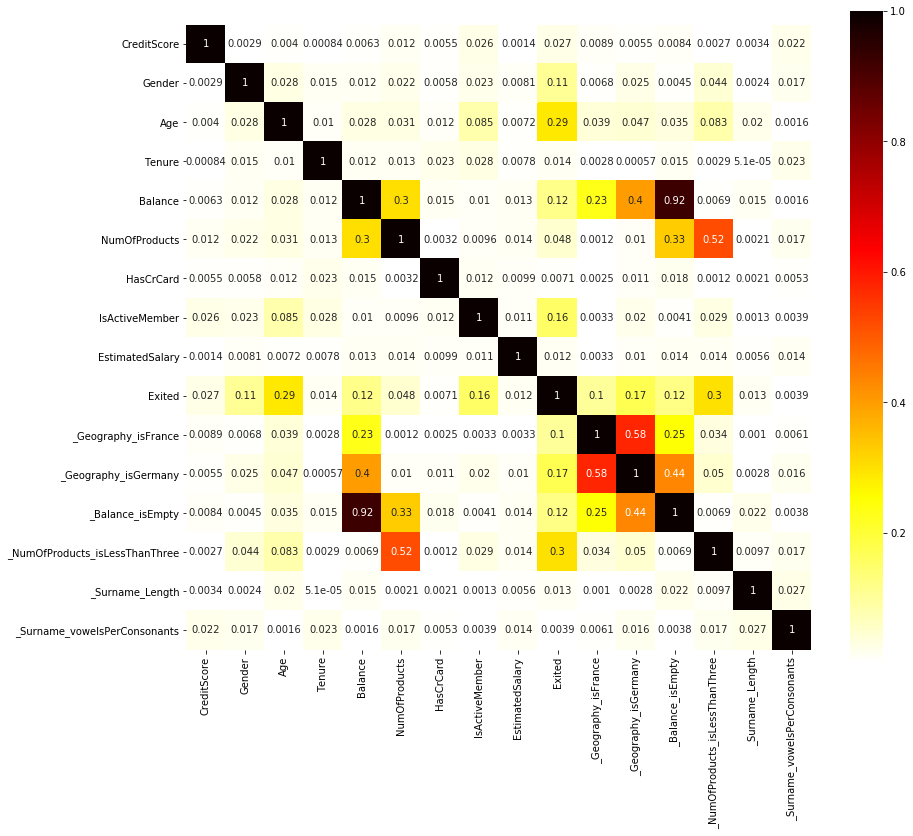

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.hot_r
plt.figure(figsize=(14,12))

df_correlation = df.corr().abs()
sns.heatmap(df_correlation, 
            square=True, cmap=colormap, annot=True)

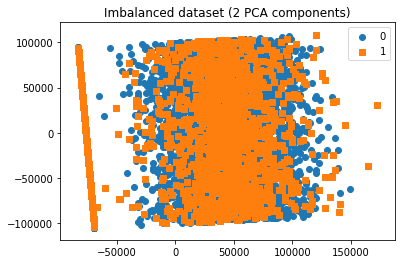

In [24]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

pca = PCA(n_components=2)
X = pca.fit_transform(X_train)

plot_2d_space(X, y_train, 'Imbalanced dataset (2 PCA components)')

In [51]:
asdf = df.drop(columns=['Exited'])

In [52]:
pca = PCA(n_components=0.9, svd_solver = 'full')
asdf = pca.fit_transform(asdf)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    asdf, 
    df['Exited'], 
    test_size=0.33)

In [46]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

pca = PCA(n_components=0.9, svd_solver = 'full')
X_pca = pca.fit_transform(asdf)
X_pca.shape
# plot_2d_space(X, y_train, 'Imbalanced dataset (2 PCA components)')

(10000, 2)

In [54]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [55]:
y_pred = xgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.01524390243902439

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
                           mode='oof_pred_bag', 
                           needs_proba=False,
                           save_dir=None, 
                           metric=accuracy_score, 
                           n_folds=4, 
                           stratified=True,
                           shuffle=True,  
                           random_state=0,    
                           verbose=2)

model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.74940334]
    fold  1:  [0.74880668]
    fold  2:  [0.75806452]
    fold  3:  [0.74492234]
    ----
    MEAN:     [0.75029922] + [0.00480211]
    FULL:     [0.75029851]

model  1:     [RandomForestClassifier]
    fold  0:  [0.79176611]
    fold  1:  [0.79176611]
    fold  2:  [0.79211470]
    fold  3:  [0.79211470]
    ----
    MEAN:     [0.79194040] + [0.00017429]
    FULL:     [0.79194030]

model  2:     [XGBClassifier]
    fold  0:  [0.79116945]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

    fold  1:  [0.79295943]
    fold  2:  [0.79330944]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

    fold  3:  [0.79091995]
    ----
    MEAN:     [0.79208957] + [0.00105586]
    FULL:     [0.79208955]

Final prediction score: [0.80484848]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=0)

# Here we go
random_search.fit(X_train, y_train)

In [ ]:
random_search.best_params_

In [ ]:
y_pred = random_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)